# Analysis

This notebook contains routines for analyzing the output of keypoint-MoSeq.

```{note}
For the widgets below to work in a jupyter notebook, you must launch jupyter from a terminal in which the keypoint_moseq environment is active.
```

## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
<project_dir>/               ** current working directory
└── <model_name>/            ** model directory
    ├── results.h5           ** model results
    └── grid_movies/         ** [Optional] grid movies folder
```
Use the code below to define your project directory and model name, and to check if the required jupyter extensions are enabled. If they are not, run the [installation commands](https://keypoint-moseq.readthedocs.io/en/latest/install.html#install-jupyter-extensions) and confirm that jupyter was launched from the `keypoint_moseq` environment, as mentioned in the note above. 


In [1]:
import keypoint_moseq as kpms

project_dir=r'C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1' # the full path to the project directory
model_name='2024_01_04-13_41_21' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#kpms.check_jupyter_extensions()

## Assign Groups

The following cell invokes an interactive spreadsheet widget that can be used to annotate each recording with a group label. These labels are important later for performing group-wise comparisons. The annotations are saved to a to  `{project_dir}/index.yaml`.

- Select one or more rows, enter a group name and click `Set Group Name`
- Click any column header to sort rows alphabetically
- Click the filter icon in a column header to filter rows by name. 
- At any point, use `Update Index File` to save current group assignments.

In [5]:
index_file=kpms.interactive_group_setting(project_dir, model_name)

In [11]:
import yaml
import pandas as pd

# YAML 파일 경로 정의
yaml_file_path = r'C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\index.yaml'

# YAML 파일 열기 및 로드
with open(yaml_file_path, 'r') as file:
    data_loaded = yaml.safe_load(file)

# 파일 리스트를 pandas DataFrame으로 변환
df = pd.DataFrame(data_loaded['files'])

# 데이터 프레임을 csv 파일로 저장
csv_file_path = r"C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\index.csv"
df.to_csv(csv_file_path, index=False)

csv_file_path

'C:\\Users\\MyPC\\Desktop\\git\\kp_moseq\\keypoint-moseq\\project\\SDSBD\\dataset5\\trainset1\\index.csv'

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions. 

In [12]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, fps=20, smooth_heading=True) 
moseq_df

,name,centroid_x,centroid_y,centroid_z,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,pre101,-4.890107,5.460056,1.800803,0.423362,0.000000,0.000000,7,0,control,True
1,pre101,-4.269766,5.373690,0.887762,0.452157,0.140808,22.144306,7,1,control,False
2,pre101,-4.569123,5.635958,1.173214,0.423362,0.297305,9.795562,7,2,control,False
3,pre101,-4.900844,5.466158,1.408959,0.452157,0.475994,8.819206,7,3,control,False
4,pre101,-4.684514,5.418027,1.637164,0.452157,0.668536,6.362174,7,4,control,False
...,...,...,...,...,...,...,...,...,...,...,...
908595,pre515,7.301109,-7.684746,4.589743,-0.685434,-0.536681,17.367390,2,11795,default,False
908596,pre515,7.286511,-7.731138,4.522948,-0.716127,-0.418509,1.652496,2,11796,default,False
908597,pre515,7.020144,-7.343358,4.684829,-0.716127,-0.308097,9.950481,2,11797,default,False
908598,pre515,6.738294,-6.960769,4.991628,-0.758452,-0.203938,11.312629,2,11798,default,False


In [21]:
import os
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21


Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [13]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df, 
    min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=20)                    # frame rate of the video from which keypoints were inferred

stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,control,pre101,0,0.300114,1.743290,-3.065187,3.126728,0.041151,6.183400,-124.841955,123.798027,15.734908,6.663298,2.343172,42.528489,0.121726,0.525949
1,control,pre101,1,0.192304,1.486307,-3.137526,3.114187,0.123514,6.251990,-122.839748,3.408401,16.852922,7.153993,1.992306,39.493306,0.077042,0.403000
2,control,pre101,2,0.305774,1.851624,-3.121521,3.113962,-0.053589,11.705295,-125.537627,125.488394,16.218228,6.830357,1.771851,35.085959,0.072419,0.369149
3,control,pre101,3,-0.036918,1.882042,-3.125108,3.133265,0.129068,10.886630,-125.438351,125.350329,16.602214,7.346626,1.620029,49.299980,0.070878,0.722826
4,control,pre101,4,-0.087757,1.867114,-3.129096,3.135656,0.016667,11.494598,-125.091086,125.204968,15.457976,6.398990,0.591141,42.712148,0.084746,1.069091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,toolowSIratio,pre215,20,-0.067616,1.720749,-2.001325,2.842858,0.174566,0.783237,-1.704338,1.986411,15.407625,5.544469,3.587299,28.234859,0.009346,0.664286
1955,toolowSIratio,pre215,21,0.249101,1.904215,-2.874001,2.933820,0.471643,14.629315,-2.888445,122.729516,16.886705,7.085963,2.623071,36.607605,0.006676,0.720000
1956,toolowSIratio,pre215,22,-0.087334,1.835148,-2.805239,2.173425,-0.869256,0.618068,-2.216731,0.225093,17.827677,7.263022,6.012503,38.338369,0.006676,0.600000
1957,toolowSIratio,pre215,23,0.370336,1.613667,-3.095006,3.134530,0.241976,10.472071,-124.962548,3.117635,17.333701,7.411888,3.150241,42.864866,0.017356,1.115385


In [23]:
import os
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `stats_df` dataframe to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21


##  Label syllables

Assign a name and short description to each syllable for downstream interpretation. These annotations are saved to `{project_dir}/{model_name}/syll_info.yaml`.

In [9]:
kpms.label_syllables(project_dir, model_name, moseq_df) 

Loading BokehJS ...

Button(description='Clear Output', style=ButtonStyle(), tooltip='Close Cell Output')

Dropdown(description='Syllable #:', options={'0 - ': {'desc': '', 'group_info': {}, 'label': '', 'movie_path':…

Output()

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

UnboundLocalError: local variable 'syll_info_df' referenced before assignment

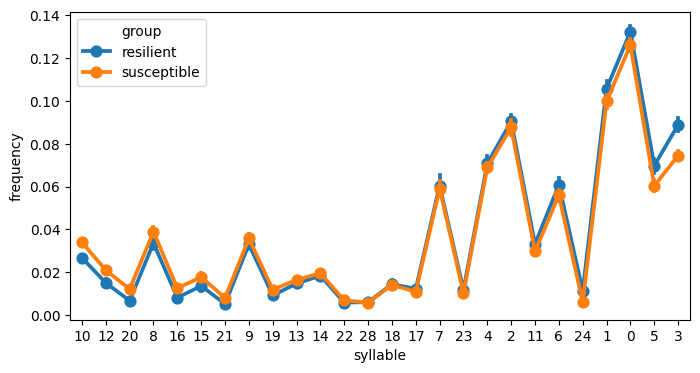

In [14]:
groups = ['resilient', 'susceptible',] # groups to be plotted
# frequency, duration, heading_mean, velocity_px_s_mean, angular_velocity_mean
kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_name,
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='diff',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    groups=groups,    # groups to be plotted
    ctrl_group='resilient',   # name of the control group for statistical testing
    exp_group='susceptible',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size    
    #groups=stats_df['group'].unique(), # groups to be plotted
)

### Transition matrices
Generate heatmaps showing the transition frequencies between syllables.

Group(s): control, dead, default, resilient, susceptible, toolowSIratio
Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\transition_matrices.png


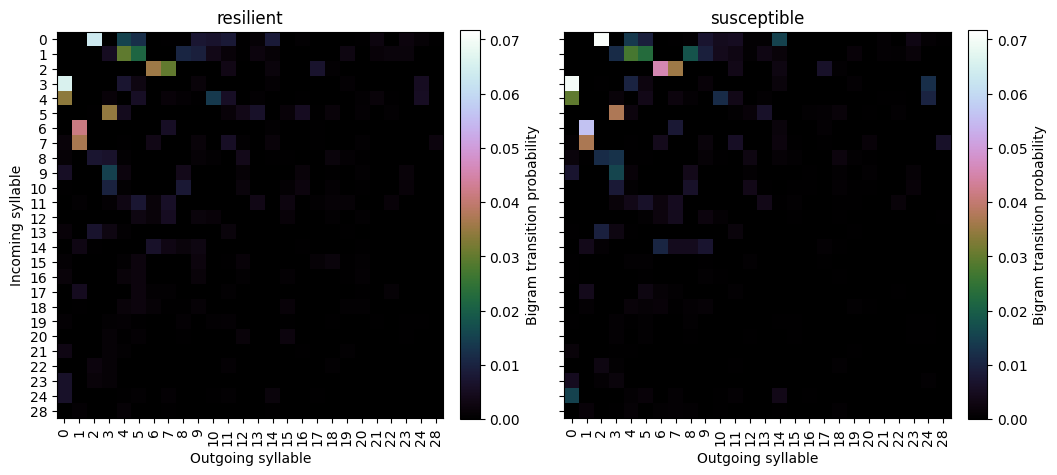

In [16]:
groups = ['resilient', 'susceptible'] # groups to be plotted


normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)    
groups = ['resilient', 'susceptible'] # groups to be plotted
kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction). The code below first generates a transition graph for each single group, and then generates a difference-graph for each pair of groups.

Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\transition_graphs.png


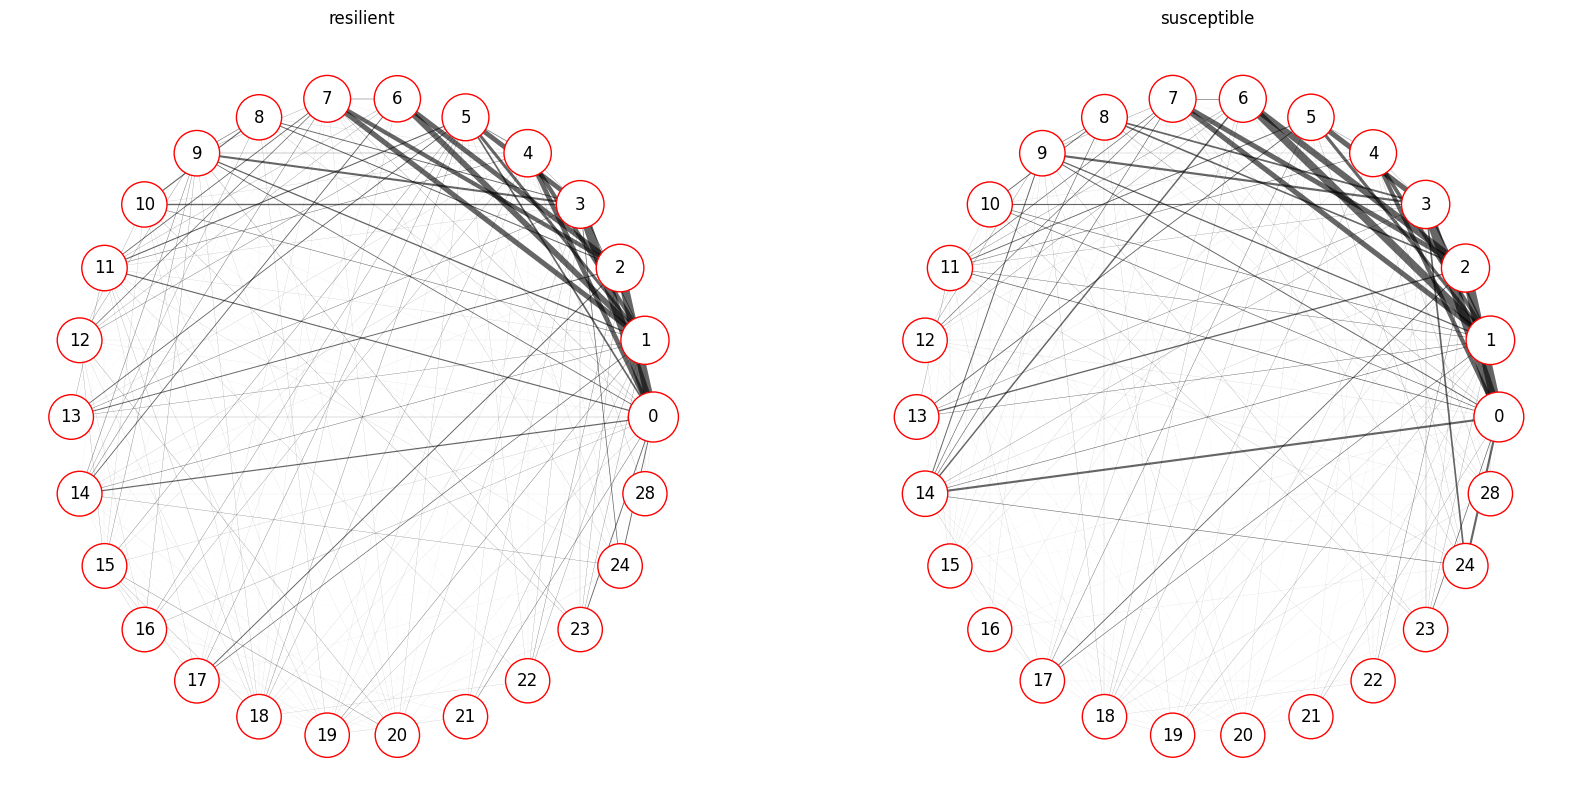

In [17]:
kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\transition_graphs_diff.png


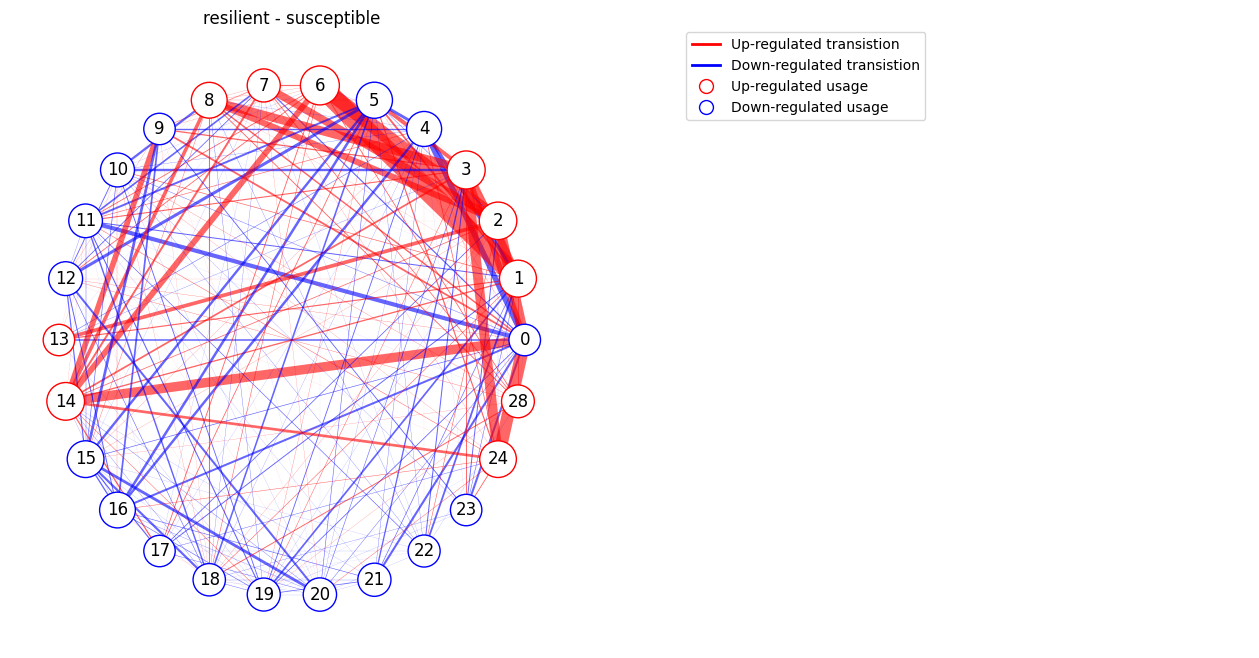

In [18]:
kpms.plot_transition_graph_difference(project_dir, model_name, 
                                      groups, trans_mats, usages, syll_include, 
                                      layout='circular') # transition graph layout ("circular" or "spring")